# R - statistical programming
This is a short introduction to the basic syntax of the R programming language. This notebook contains the basics for understanding most of the amplicon data analysis workflow.

**Learn R, beyond this notebook:**
* [DataCamp](https://www.datacamp.com/)
* [Code academy](https://www.codecademy.com/learn/learn-r)
* [Coursera](https://www.coursera.org/learn/r-programming)
* [or one of the many youtube videos](https://www.youtube.com/watch?v=fDRa82lxzaU)

* **But:** It takes many(!) hours to become a confindent R user.


## Comments<a class="anchor" id="comment"></a>

In [1]:
# This is a comment. The # at the beginning ensures that R will ignore it.

**You should have MANY comments in your code!**

Comments will not only help yourself when you look at the code later, but also if/when you share your code with others. It is always better to comment too much than too little.

## Working directory<a class="anchor" id="workdir"></a>
The working directory is the place where R will read and write files/plots to and from.

It is easiest if this is the same place as where the script is located.

In Rstudio, set this by clicking "Session" then "Set Working Directory" then "To Source File Location".

Now R looks for datafiles and saves plots in the same location as where your script is located.

You can also set the working directory with setwd:

In [ ]:
setwd("/path/to/my/data")

And you can get the current working directory

In [2]:
getwd()

[1] "C:/Gits/amplicon_data_analysis/ipynb"

## Basic data types<a class="anchor" id="types"></a>
* **Numerics:** Numbers, e.g 1, 2, 1e3, 0.7, -5.4
* **Characters:** Strings, e.g. "Hello", "world"
* **Logicals:** Boolean, TRUE or FALSE

## Simple arithmetics<a class="anchor" id="arithmetics"></a>
R understands simple arithmetics

In [3]:
2+2

[1] 4

In [4]:
5*2/(1-2)^3

[1] -10

## Objects<a class="anchor" id="objects"></a>
We can save things in objects (in this case x and y)

In [5]:
x <- 2
y <- "Hello"

Now the names x and y are refering to some data. Working with objects is fundamental in R (and most other programming languages). You will have all your data stored in objects, and you run functions on those objects to create an output (which can be saved as another object). 

The names of the objects can what ever you like, however not with spaces or special characters, and not starting with a number:

In [6]:
YouCanNameYourObject_LikeThis1234 <- 5

In [7]:
# We can use the objects for arithmetics
YouCanNameYourObject_LikeThis1234 * 3

[1] 15

In [8]:
# We can run functions on the objects
toupper(y)

[1] "HELLO"

In [9]:
# We can change objects
x <- 2 * 5
print(x)

[1] 10


In [10]:
# We can copy objects
k <- x
print(k)

[1] 10


In [11]:
# Characters, such as "Hello" are always quoted
# Look what happens if we forget the quotation:
y <- Hello
# It looks for an object called Hello, which does not exist
# So quotations are how objects and strings can be differentiated

ERROR: Error in eval(expr, envir, enclos): objekt 'Hello' blev ikke fundet


## Functions<a class="anchor" id="functions"></a>
Functions take the form of functionName(inputToFunction).

You can always find help on how a function works by typing ?functionName

In [ ]:
?mean

## Vectors<a class="anchor" id="vectors"></a>
We can make vectors with more than one number, character, or logical

In [12]:
# Use the function c() to create a vector
nums <- c(1, 4, 6, 10, 12, 5, 2)
test <- c("Hello", "world.", "Anybody", "there?")

We can do simple operations on these vectors

In [13]:
# Minimum
min(nums)

[1] 1

In [14]:
# Maximum
max(nums)

[1] 12

In [15]:
# Sum
sum(nums)

[1] 40

In [16]:
# Log10
log10(nums)

[1] 0.0000000 0.6020600 0.7781513 1.0000000 1.0791812 0.6989700 0.3010300

In [17]:
# Access the third element
nums[3]
test[3]

[1] 6

[1] "Anybody"

Using square brackets we can subset a vector with another vector

In [18]:
# First two elements
test[c(1, 2)]

[1] "Hello"  "world."

We can also subset with a logical, such that only the TRUE ones are in the output

In [19]:
test[c(TRUE, FALSE, TRUE, FALSE)]

[1] "Hello"   "Anybody"

In [20]:
# Append strings
paste("before", test, "after")

[1] "before Hello after"   "before world. after"  "before Anybody after"
[4] "before there? after"

In [21]:
paste("Number", nums, sep=":")

[1] "Number:1"  "Number:4"  "Number:6"  "Number:10" "Number:12" "Number:5" 
[7] "Number:2"

## Factors<a class="anchor" id="factors"></a>
Factors are a special type of vector. In a factor the strings/numbers are given "levels" which by default are alphabetical. These levels for example determine the order categorical variables are plotted (as we will see later), and changing this order, means changing the factor levels

In [22]:
x <- factor(c("A", "A", "B", "B"))

Click the > to see the levels

In [23]:
x

[1] A A B B
Levels: A B

In [24]:
x <- factor(c("A", "A", "B", "B"), levels = c("B", "A"))
x

[1] A A B B
Levels: B A

## Convert between types<a class="anchor" id="convert"></a>
You can convert between types with as.type. Always check the output! Converting might do something unexpected, and is not always reversible

In [25]:
as.character(c(1, 2, 3))

[1] "1" "2" "3"

In [26]:
as.numeric(c("1", "2"))

[1] 1 2

In [27]:
as.factor(c("A", "B", "C"))

[1] A B C
Levels: A B C

In [28]:
as.numeric(c(TRUE, FALSE))

[1] 1 0

In [29]:
as.character(c(TRUE, FALSE))

[1] "TRUE"  "FALSE"

In [30]:
as.character(factor(c("A", "B")))

[1] "A" "B"

In [31]:
as.numeric(factor(c("A", "B")))

[1] 1 2

In [32]:
as.logical(c(1, 2.1, -3, 0))

[1]  TRUE  TRUE  TRUE FALSE

We cannot convert strings to numbers, and the result is therefore NA (missing data):

In [33]:
as.numeric(c("A", "B"))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


[1] NA NA

## Missing data<a class="anchor" id="missing"></a>
Missing data is represented by NA. NAs can be mixed with any data type

In [34]:
c(1, 2, 4, NA)

[1]  1  2  4 NA

In [35]:
# Factors ignore NAs in the levels (click the > to see the levels)
factor(c(1, 2, 4, NA))

[1] 1    2    4    <NA>
Levels: 1 2 4

We can look for missing values

In [36]:
is.na(c(1, 2, 4, NA))

[1] FALSE FALSE FALSE  TRUE

Since the output is a logical we can negate it:

In [37]:
!is.na(c(1, 2, 4, NA))

[1]  TRUE  TRUE  TRUE FALSE

And we can use that output to get only values that are not missing with square brackets

In [38]:
x <- c(1, 2, 4, NA)
x[!is.na(x)]

[1] 1 2 4

## Comparisons<a class="anchor" id="compare"></a>
We can compare variables to check if they are identical or not.

In [39]:
x <- c(10, 11, 12)

Test if equal to (note that there are 2 equal signs!):

In [40]:
x == 10

[1]  TRUE FALSE FALSE

Test if not equal to:

In [41]:
x != 10

[1] FALSE  TRUE  TRUE

Larger than:

In [42]:
x > 11

[1] FALSE FALSE  TRUE

Smaller than or equal:

In [43]:
x <= 11

[1]  TRUE  TRUE FALSE

We can count using comparisons. If you use sum on a logical it will count the TRUEs. 

Count those above 10:

In [44]:
sum(x > 10)

[1] 2

Compare vectors of equal size:

In [45]:
c("A", "B" ,"C") == c("K", "B", "F")

[1] FALSE  TRUE FALSE

Check which elements are in a vector:

In [46]:
c("A", "B" ,"C") %in% c("C", "D", "E", "F", "G")

[1] FALSE FALSE  TRUE

All logicals can be negated:

In [47]:
!c("A", "B" ,"C") %in% c("C", "D", "E", "F", "G")

[1]  TRUE  TRUE FALSE

All logicals can be combined, with and (&) and or (|):

In [48]:
x == 10 | x == 11

[1]  TRUE  TRUE FALSE

Several logical operations can be combined with parentheses:

In [49]:
y <- c(9, NA, 12)

In [50]:
( x > 10 & y > 10 & !is.na(y)) | ( x < 10 & !is.na(y))

[1] FALSE FALSE  TRUE

## Lists<a class="anchor" id="lists"></a>
We can make lists, which can contain both numbers, strings, and anything else in the same list

In [51]:
# Use the function list() to create list
mylist <- list(this = 2,
               these = c("salmon", "herring"),
               WhatEverYouWantToCallIt = c(TRUE, TRUE, FALSE))

In [52]:
# Access by name
mylist[["WhatEverYouWantToCallIt"]]

[1]  TRUE  TRUE FALSE

In [53]:
# or by the order (index)
mylist[[2]]

[1] "salmon"  "herring"

## Matrix<a class="anchor" id="matrix"></a>
A matrix is a two-dimensional array. A bit like an excel spreadsheet with rows and columns. However, all the cells has to contain the same type of data. Either all are numerics, all are characters, or all are logicals.

In [54]:
mat <- matrix(1:9, nrow = 3, ncol = 3)
mat

1,4,7
2,5,8
3,6,9


## Dataframes<a class="anchor" id="dataframes"></a>
Dataframes are objects with columns and rows like a matrix. However, in a data.frame the columns can contain different data.types. This is a very common way to store data, where each row is a sample, and each column is a variable.

In [55]:
# When we read data from a text file it will be imported as a data.frame
# Lets load an external text file with data
df <- read.table("mydata.csv", header = TRUE, sep = ";")
# header = TRUE means that the first line in our text file contains the names of the columns
# sep = ";" is because semicolons seperate the columns in the external file
print(df)

   var1 var2 group exp
1     1   32     A   1
2     2   54     A   1
3     3   56     A   1
4     4   10     A   2
5     5   12     A   2
6     6   76     B   1
7     7   65     B   1
8     8   80     B   2
9     9   97     B   2
10   10   92     B   2


In [56]:
# Use the str() function to check the structure of the dataframe
str(df)

'data.frame':	10 obs. of  4 variables:
 $ var1 : int  1 2 3 4 5 6 7 8 9 10
 $ var2 : int  32 54 56 10 12 76 65 80 97 92
 $ group: chr  "A" "A" "A" "A" ...
 $ exp  : int  1 1 1 2 2 1 1 2 2 2


In [57]:
# Access a column in a dataframe with the $ sign
df$group

[1] "A" "A" "A" "A" "A" "B" "B" "B" "B" "B"

When you read an external file into a data.frame in R strings are converted to factors, as you can see from the output above. 

You should always check that the file has been loaded correctly, by running str() or running View() on the data.frame

### Access data in dataframes
Rows and columns can be accessed with [rows, columns]

Nothing after the comma means that all rows are selected

Nothing before the comma means that all columns are selected

In [58]:
# First row, second column:
df[1, 2]

[1] 32

In [59]:
# First row, all columns:
df[1, ]

,var1,var2,group,exp
,<int>,<int>,<chr>,<int>
1,1,32,A,1


In [60]:
# All rows, first column
df[, 1]

[1]  1  2  3  4  5  6  7  8  9 10

In [61]:
# First and second row, column named 'var2'
df[c(1, 2), "var2"]

[1] 32 54

In [62]:
# First four rows, columns named 'var1' and 'var2'
df[1:4, c("var1", "var2")]
# 1:4 means integers 1 to 4

,var1,var2
,<int>,<int>
1,1,32
2,2,54
3,3,56
4,4,10


### Add and change data in dataframes

In [63]:
# New columns can be made with the $ sign
df$var2_log10 <- log10(df$var2)

In [64]:
# Change the data in 10th row and second column
df[10, 2] <- 50

In [65]:
# Add 1 to the entire first column
df[, 1] <- df[, 1] + 1

In [66]:
# Input 20 in the second column, only if "group" column is equal to "A"
df[df$group == "A", 2] <- 20
# There are two = signs!

df

var1,var2,group,exp,var2_log10
<dbl>,<dbl>,<chr>,<int>,<dbl>
2,20,A,1,1.505150
3,20,A,1,1.732394
4,20,A,1,1.748188
5,20,A,2,1.000000
6,20,A,2,1.079181
7,76,B,1,1.880814
8,65,B,1,1.812913
9,80,B,2,1.903090
10,97,B,2,1.986772


## Tablulating data
The table() function is very neat for counting the number of occurrences of different strings or numbers

In [67]:
table(df$group)


A B 
5 5 

You can tabulate multiple variables to get counts of all possible combinations:

In [68]:
table(df$group, df$exp)

   
    1 2
  A 3 2
  B 2 3

## Saving data<a class="anchor" id="saving"></a>
When you click Ctrl+s or you go to File -> Save, you only save the script

You don't save the data (what you see in the upper right corner of RStudio)

If you have run an analysis that took a long time to run, it is nice to save the results so you don't have to rerun the whole thing again.

In [ ]:
# To save all data run this:
save.image("Mydata.RData")

In [ ]:
# When you open R another day, you load it with the load function
load("Mydata.RData")

## Simple plots<a class="anchor" id="plot"></a>

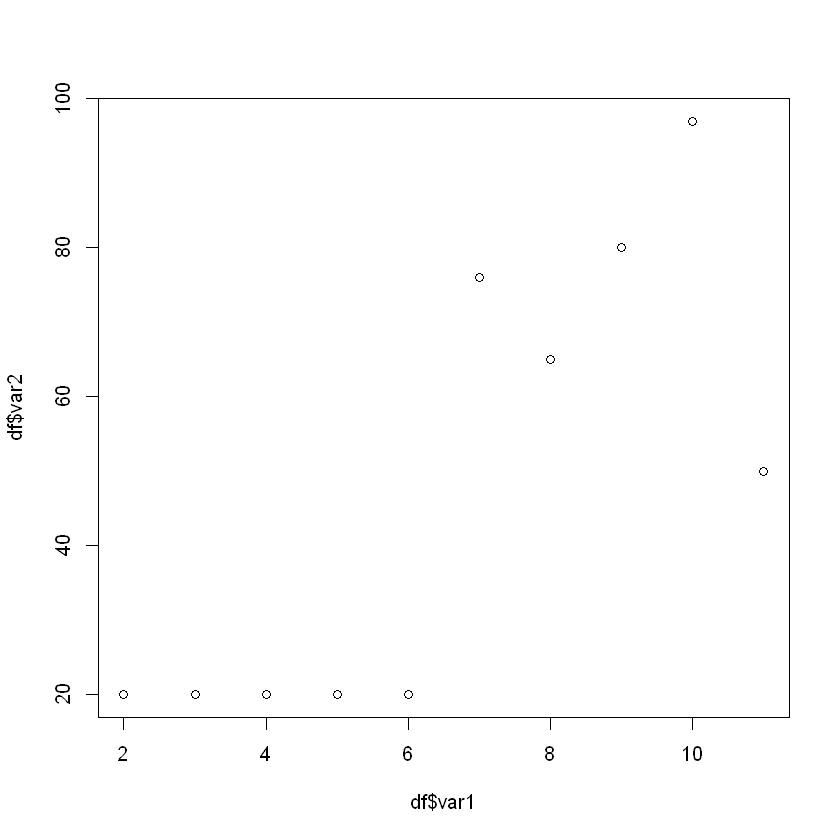

In [69]:
# A simple scatter plot
plot(df$var1, df$var2)

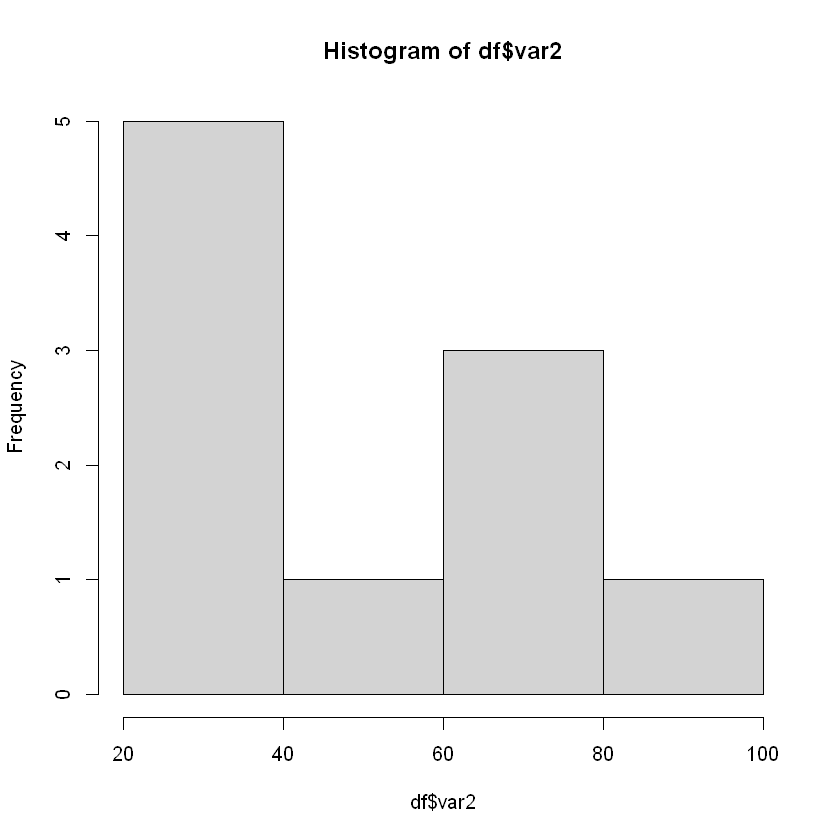

In [70]:
# Histogram
hist(df$var2)

## Packages<a class="anchor" id="packages"></a>
#### Load packages

Packages contain convenient functions that can considerably ease or enhance you R coding. 

When library(package name) is run, we can use functions from the package

It has to be run each time we start up R

In [71]:
# ggplot2 is a package for making nice plots.
library(ggplot2)

We sometimes get warnings that the package is not build for our specific version of R (as above). This is usually not a problem, but if you experience problems this could be the cause, and it can be solved by installing the latest version of R and installing the package again.

#### Install packages
Packages are usually installed with install.packages("PackageName"). This only has to be done one time.

In [ ]:
install.packages("car")

The above only works for packages on [CRAN](https://cran.r-project.org/web/packages/available_packages_by_name.html). However, some bioinformatics packages are on [BioConductor](https://www.bioconductor.org/install/), which has to be installed differently (see link). Some packages are only on GitHub and has to be installed through there (see for example [this one](https://github.com/Russel88/MicEco)).

## Simple ggplotting<a class="anchor" id="ggplot"></a>
ggplot2 is a great packages for making neat plots. There is a [notebook on the details of ggplot2](https://microucph.github.io/amplicon_data_analysis/html/ggplot2.html), but below is described how to make a simple plot.

Let's make a similar scatterplot as above, but with ggplot2

A ggplot is always made by starting with the ggplot(data, aes(...)) line
* data is a data.frame that contains the data to plot.
* The aes() function are the aesthetics. Here we tell ggplot which columns in the data.frame to use for plotting.
* geom_point() tells ggplot to plot data as points.

In [72]:
# First define and save the plot as an object:
p <- ggplot(df, aes(x = var1, y = var2)) +
  geom_point()

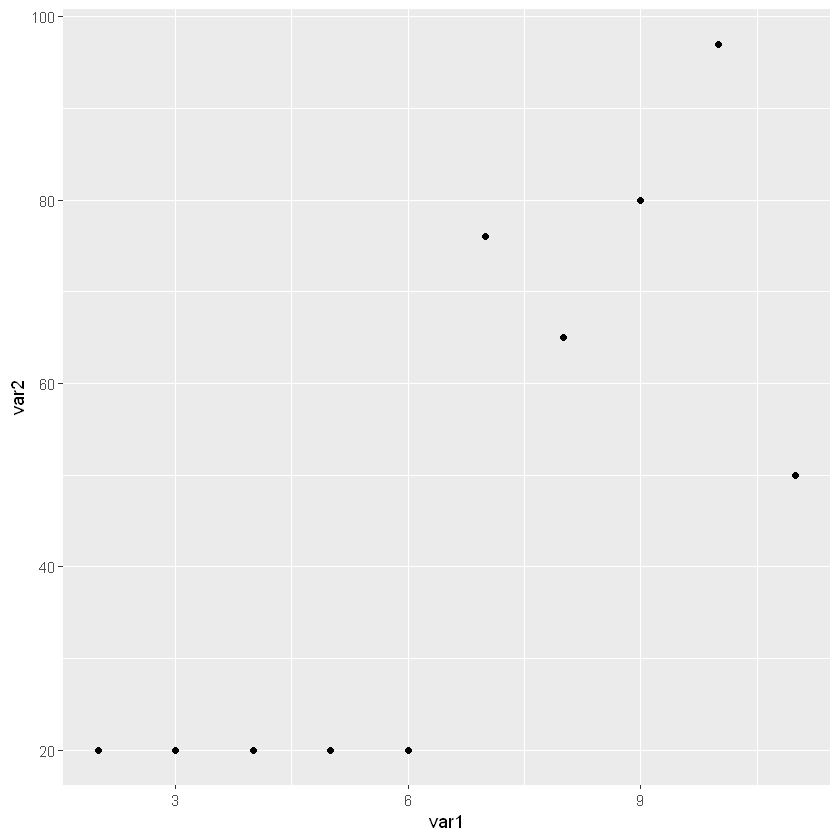

In [73]:
# Then view the plot:
p

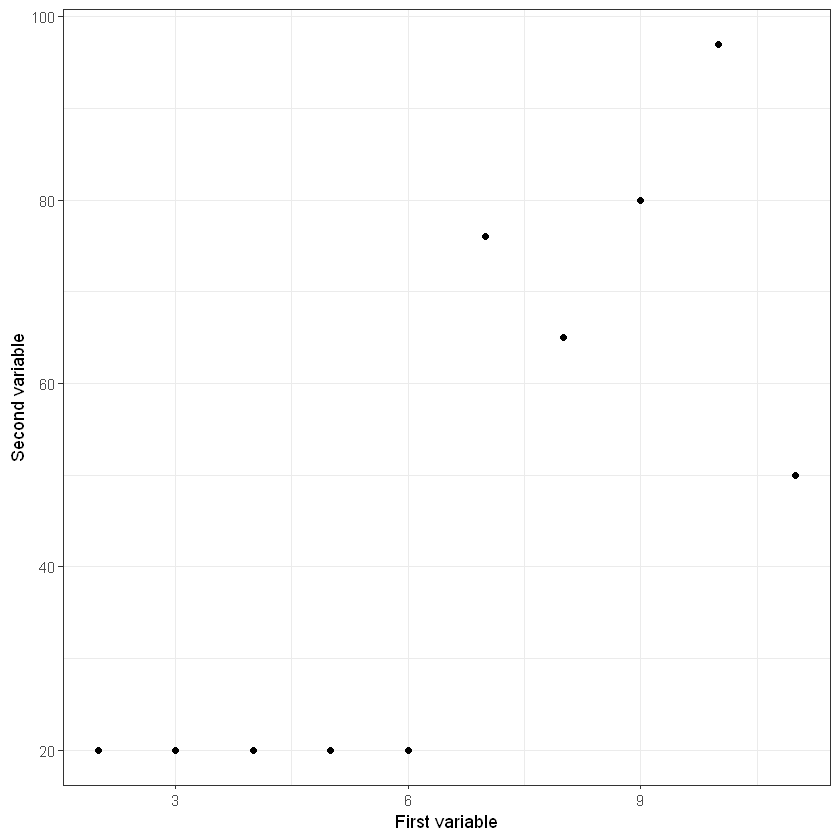

In [74]:
# Extra things can be added with +'s
p <- ggplot(df, aes(x = var1, y = var2)) +
  geom_point() +
  xlab("First variable") +
  ylab("Second variable") +
  theme_bw() # Remove the grey background
p

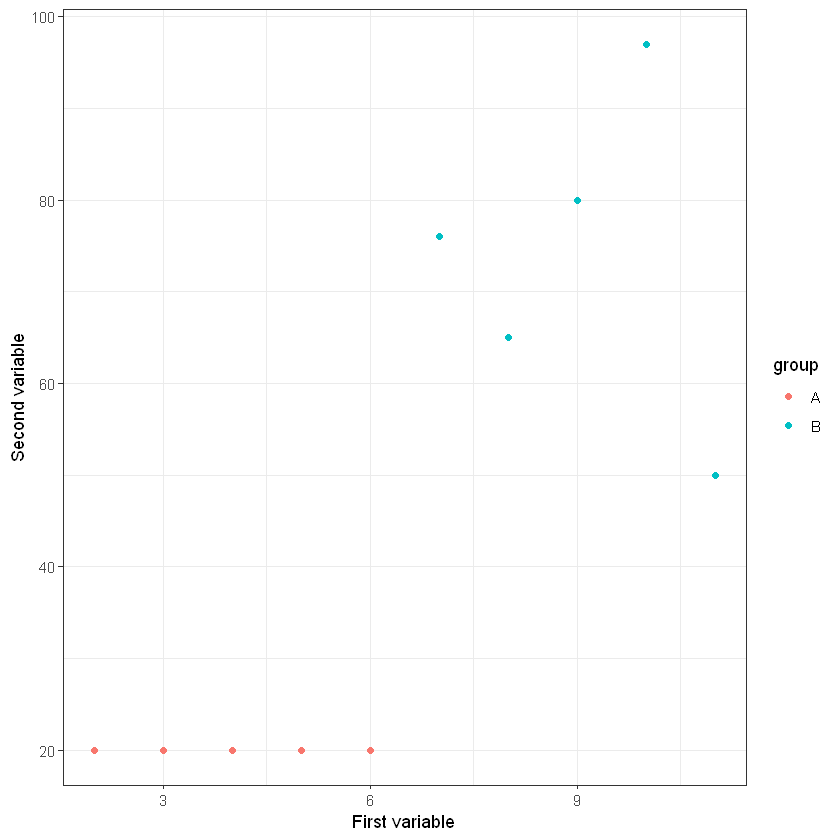

In [75]:
# Color by group
p <- ggplot(df, aes(x = var1, y = var2, color = group)) +
  geom_point() +
  xlab("First variable") +
  ylab("Second variable") +
  theme_bw()
p

In [76]:
# Save the plot
ggsave(filename = "MyFirstGGplot.png", plot = p, 
       width = 10, height = 6, units = "cm")